# Building Encoder - Decoder Model

#### In this file I will :
- Preprocess the Data, for encoder - decoder model.
- Build and train the encoder - decoder model.

### Defining Path for both Training and Testing data.

In [1]:
import os
## setting up the path where the file is present.
train_data_file_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Train_data.csv'
test_data_file_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Test_data.csv'
## get the path in the format required by OS
train_data_file_path= os.path.join(train_data_file_path)
test_data_file_path= os.path.join(test_data_file_path)

### Loading Clean Training Data.

In [2]:
import numpy as np
import pandas as pd

#### Loading Training data.

In [3]:
## reading the csv file.
train_data = pd.read_csv(train_data_file_path, encoding='utf-8')
## looking at the data.
train_data.sample(5)

,Source,Target
111800,ce serpent nest pas venimeux,sos this snake is not venomous eos
12639,je mets un point dhonneur à me lever avant six...,sos i make a point of getting up before six eos
31244,le monde semble devenir plus petit,sos the world seems to get smaller eos
88318,passe le bonjour à tom,sos tell tom i said hi eos
89570,les animaux ne peuvent pas distinguer le vrai ...,sos animals cannot distinguish right from wron...


### Preprocessing the data for the encoder - decoder model.
- The model requires the data in the form of numerical sequences. Since the model requires numerical data.
- Although we have text data, but we need to convert the SEQUENCE OF TEXT to NUMERICAL SEQUENCES.
- In this project we will do the conversion word wise.

#### Creating the function, which will convert text sequences to numerical, sequences.

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [5]:
def text_to_num_sequences(text_sequences) :
    
    '''This function convertes text sequeces to numerical sequences and returns numerical sequences.'''
    
    ## create a tokenizer -> this will map each word to a number.
    ## defining the num_words -> this indicates that we need maximum of these words only to process.
    num_words = 1500
    ## initializing the tokenizer
    ## defining OOV -> this handles a word if it is out of vocabulary
    token = Tokenizer(num_words=num_words, oov_token="<UKN>")
    ## create the word_index -> word_index is the dictionary which maps the words to a numeric value.
    token.fit_on_texts(text_sequences)
    ## saving word_index.
    word_index = token.word_index
    ## limiting the words to num_words in the dictionary.
    word_indices = {word: index for word, index in token.word_index.items() if index <= num_words}
    ## converting sequences.
    num_sequences = token.texts_to_sequences(text_sequences)
    ## define vocabulary size -> this is the size of the word_index.
    ## we are incrementing it by 1 because the indexing starts with 1.
    vocab_size = len(word_indices) + 1
    
    return num_sequences, token, vocab_size, word_indices

#### Creating a function which will return padded numerical sequences on the basis of common maximum length.

In [6]:
def get_pad_sequeces(source_num_sequenecs, target_num_sequences, max_common_length = None) :
    
    '''This function returns padded sequences and maximun common length.'''
    
    ## finding out the maximum lenght of source sequences.
    source_max_len = max([len(seq) for seq in source_num_sequenecs])
    ## finding out the maximum lenght of target sequences.
    target_max_len = max([len(seq) for seq in target_num_sequences])    
    ## finding the common maximum length.
    COMMON_MAX_LENGTH = max(source_max_len, target_max_len)
    ## checking if the argument already has a max_common_length.
    if max_common_length != None :
        COMMON_MAX_LENGTH = max_common_length
    ## pad the sequences.
    source_padded_sequences = pad_sequences(source_num_sequenecs, maxlen = COMMON_MAX_LENGTH, padding='post')
    target_padded_sequences = pad_sequences(target_num_sequences, maxlen = COMMON_MAX_LENGTH, padding='post')
    
    return source_padded_sequences, target_padded_sequences, COMMON_MAX_LENGTH

#### Creating the function which integrates the above two function for simpler use.

In [7]:
def convert_data(source, target, max_common_length = None) :
    
    '''This function returns the complete converted set.'''
    
    ## get numerical sequences.
    source_num_sequences, source_token, source_vocab_size, source_word_index = text_to_num_sequences(source)
    target_num_sequences, target_token, target_vocab_size, target_word_index = text_to_num_sequences(target)
    ## get padded sequences.
    source_padded_sequences, target_padded_sequences, COMMON_MAX_LENGTH = get_pad_sequeces(source_num_sequences, target_num_sequences, max_common_length = max_common_length)
    
    return source_padded_sequences, target_padded_sequences, COMMON_MAX_LENGTH, source_vocab_size, target_vocab_size, source_word_index, target_word_index

#### Converting Training Data.

In [8]:
## taking out columns from the train_data dataframe created above.
source = train_data.Source
target = train_data.Target

In [9]:
## looking at the shape of the data.
source.shape, target.shape

((172352,), (172352,))

In [10]:
## calling the function
source_sequences, target_sequences, COMMON_MAX_LENGTH, source_vocab_size, target_vocab_size, source_word_index, target_word_index = convert_data(source, target)

#### Looking at instances and shapes.

In [11]:
## looking at the instances and shapes returned by the function.
source_sequences.shape, target_sequences.shape, COMMON_MAX_LENGTH, source_vocab_size, target_vocab_size

((172352, 55), (172352, 55), 55, 1501, 1501)

In [12]:
source_word_index

{'<UKN>': 1,
 'je': 2,
 'de': 3,
 'pas': 4,
 'que': 5,
 'ne': 6,
 'à': 7,
 'le': 8,
 'la': 9,
 'vous': 10,
 'tom': 11,
 'il': 12,
 'est': 13,
 'tu': 14,
 'un': 15,
 'ce': 16,
 'a': 17,
 'nous': 18,
 'les': 19,
 'une': 20,
 'en': 21,
 'jai': 22,
 'suis': 23,
 'me': 24,
 'pour': 25,
 'ça': 26,
 'faire': 27,
 'cest': 28,
 'dans': 29,
 'plus': 30,
 'des': 31,
 'elle': 32,
 'qui': 33,
 'tout': 34,
 'te': 35,
 'fait': 36,
 'du': 37,
 'ma': 38,
 'veux': 39,
 'avec': 40,
 'mon': 41,
 'se': 42,
 'au': 43,
 'si': 44,
 'et': 45,
 'sont': 46,
 'cette': 47,
 'y': 48,
 'quil': 49,
 'cela': 50,
 'très': 51,
 'pense': 52,
 'nest': 53,
 'son': 54,
 'sur': 55,
 'pourquoi': 56,
 'moi': 57,
 'dit': 58,
 'temps': 59,
 'sais': 60,
 'votre': 61,
 'peux': 62,
 'être': 63,
 'été': 64,
 'était': 65,
 'ici': 66,
 'chose': 67,
 'nai': 68,
 'ils': 69,
 'jamais': 70,
 'lui': 71,
 'bien': 72,
 'comment': 73,
 'où': 74,
 'estce': 75,
 'ton': 76,
 'vraiment': 77,
 'quelque': 78,
 'on': 79,
 'beaucoup': 80,
 'dire': 81

In [13]:
target_word_index

{'<UKN>': 1,
 'sos': 2,
 'eos': 3,
 'i': 4,
 'you': 5,
 'to': 6,
 'the': 7,
 'is': 8,
 'not': 9,
 'a': 10,
 'do': 11,
 'that': 12,
 'tom': 13,
 'are': 14,
 'it': 15,
 'have': 16,
 'of': 17,
 'he': 18,
 'this': 19,
 'in': 20,
 'we': 21,
 'me': 22,
 'was': 23,
 'am': 24,
 'what': 25,
 'my': 26,
 'will': 27,
 'for': 28,
 'did': 29,
 'your': 30,
 'be': 31,
 'want': 32,
 'know': 33,
 'on': 34,
 'like': 35,
 'she': 36,
 'would': 37,
 'with': 38,
 'can': 39,
 'they': 40,
 'think': 41,
 'how': 42,
 'at': 43,
 'all': 44,
 'his': 45,
 'go': 46,
 'there': 47,
 'and': 48,
 'here': 49,
 'about': 50,
 'cannot': 51,
 'time': 52,
 'get': 53,
 'him': 54,
 'were': 55,
 'us': 56,
 'very': 57,
 'going': 58,
 'no': 59,
 'why': 60,
 'as': 61,
 'had': 62,
 'up': 63,
 'one': 64,
 'has': 65,
 'could': 66,
 'out': 67,
 'just': 68,
 'if': 69,
 'need': 70,
 'should': 71,
 'her': 72,
 'who': 73,
 'good': 74,
 'does': 75,
 'so': 76,
 'let': 77,
 'mary': 78,
 'when': 79,
 'an': 80,
 'help': 81,
 'tell': 82,
 'come':

In [14]:
source_sequences

array([[  11,   17,    1, ...,    0,    0,    0],
       [  44,    2,    1, ...,    0,    0,    0],
       [ 898,    3,   27, ...,    0,    0,    0],
       ...,
       [   1,    7, 1489, ...,    0,    0,    0],
       [  19,    1,    1, ...,    0,    0,    0],
       [  47,  698,    1, ...,    0,    0,    0]])

In [15]:
target_sequences

array([[   2,   13,  143, ...,    0,    0,    0],
       [   2,   69,    4, ...,    0,    0,    0],
       [   2,  190,    6, ...,    0,    0,    0],
       ...,
       [   2,  286,  103, ...,    0,    0,    0],
       [   2,    7, 1398, ...,    0,    0,    0],
       [   2,   12,  532, ...,    0,    0,    0]])

In [16]:
target_vocab_size

1501

### Note :  I have taken first 1500 words only due to low speed issue, Although we have to train it on all words, Also I have taken less units and epochs to build and train the model.

### Building Encoder - Decoder Model

In [17]:
from keras.models import Model
from keras.layers import Dense, Embedding, Bidirectional, LSTM, TimeDistributed, RepeatVector, Input, Concatenate

#### Defining Encoder

In [18]:
## 1st layer is the input layer.
encoder_input = Input(shape=(None,))
## 2nd layer is the embedding layer
encoder_embd = Embedding(source_vocab_size,100, mask_zero=True)(encoder_input)
## 3rd layer is the LSTM Bideirectional layer.
## The biderectional is being added because it will capture sequence information from both past and future.
encoder_lstm = Bidirectional(LSTM(32, return_state=True))
## getting output from encoder.
encoder_output, forw_state_h, forw_state_c, back_state_h, back_state_c = encoder_lstm(encoder_embd)
state_h_final = Concatenate()([forw_state_h, back_state_h])
state_c_final = Concatenate()([forw_state_c, back_state_c])

#### Defining Context vector

In [19]:
## Now take only states and create context vector
encoder_states= [state_h_final, state_c_final]

#### Defining Decoder

In [20]:
decoder_input = Input(shape=(None,))
# For zero padding we have added +1 in marathi vocab size
decoder_embd = Embedding(target_vocab_size, 100, mask_zero=True)
decoder_embedding= decoder_embd(decoder_input)
# We used bidirectional layer above so we have to double units of this lstm
decoder_lstm = LSTM(64, return_state=True,return_sequences=True )
# just take output of this decoder dont need self states
decoder_outputs, _, _= decoder_lstm(decoder_embedding, initial_state=encoder_states)
# here this is going to predicct so we can add dense layer here
# here we want to convert predicted numbers into probability so use softmax
decoder_dense= Dense(target_vocab_size, activation='softmax')
# We will again feed predicted output into decoder to predict its next word
decoder_outputs = decoder_dense(decoder_outputs)

#### Defining Full Model

In [21]:
full_model = Model([encoder_input, decoder_input], decoder_outputs)
full_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Summary of the Model

In [22]:
full_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 100)            150100    ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 bidirectional (Bidirection  [(None, 64),                 34048     ['embedding[0][0]']           
 al)                          (None, 32),                                                     

### Plot The Model

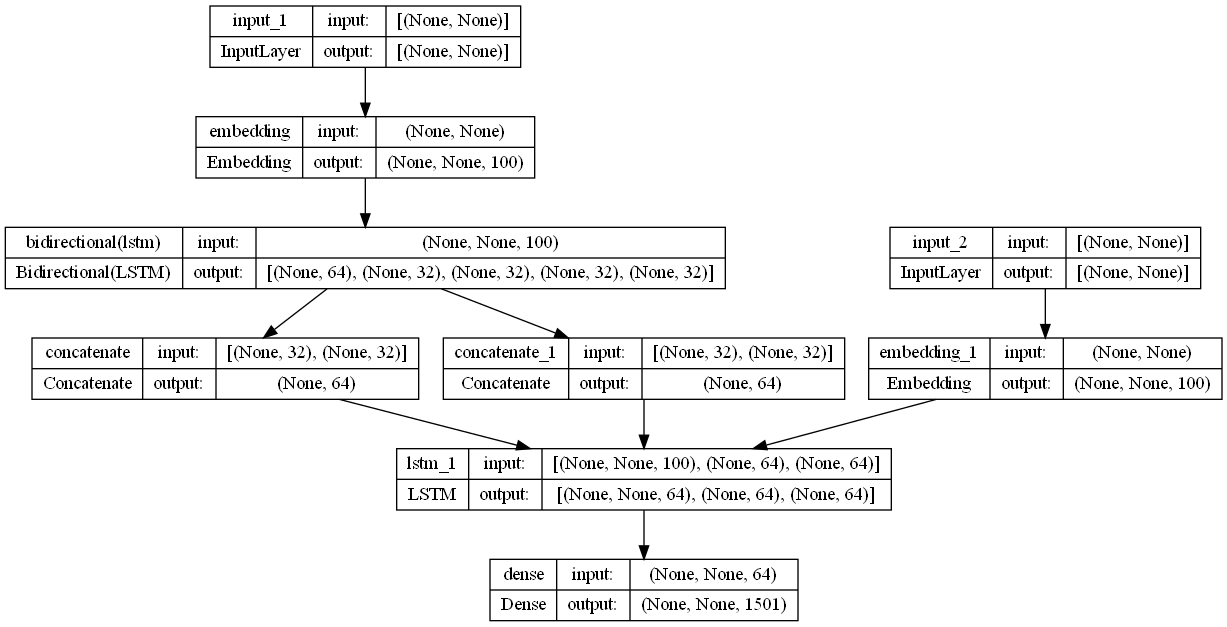

In [23]:
from tensorflow.keras.utils import  plot_model
plot_model(full_model,show_shapes=True, to_file=r"C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\model_architecture.png")

### Training The Model

In [24]:
encoder_input_data = source_sequences
decoder_input_data = target_sequences[:,:-1]
decoder_target_data = target_sequences[:,1:]

In [25]:
full_model.fit([encoder_input_data, decoder_input_data],decoder_target_data, batch_size = 128, epochs = 15)

Epoch 1/15
1347/1347 [==============================] - 249s 179ms/step - loss: 3.7616 - accuracy: 0.3462
Epoch 2/15
1347/1347 [==============================] - 251s 186ms/step - loss: 2.7238 - accuracy: 0.4951
Epoch 3/15
1347/1347 [==============================] - 247s 184ms/step - loss: 2.3523 - accuracy: 0.5461
Epoch 4/15
1347/1347 [==============================] - 248s 184ms/step - loss: 2.1239 - accuracy: 0.5773
Epoch 5/15
1347/1347 [==============================] - 248s 184ms/step - loss: 1.9591 - accuracy: 0.6002
Epoch 6/15
1347/1347 [==============================] - 250s 185ms/step - loss: 1.8365 - accuracy: 0.6185
Epoch 7/15
1347/1347 [==============================] - 249s 185ms/step - loss: 1.7396 - accuracy: 0.6337
Epoch 8/15
1347/1347 [==============================] - 254s 189ms/step - loss: 1.6615 - accuracy: 0.6467
Epoch 9/15
1347/1347 [==============================] - 252s 187ms/step - loss: 1.5962 - accuracy: 0.6579
Epoch 10/15
1347/1347 [=======================

### Note : The accuracy is 70%, this can be improved further, but due to low speed and computational power I have not created a big model.

### Encoder Prediction Model Creation

In [26]:
encoder_model = Model(encoder_input, encoder_states)

### Decoder Prediction Model Creation

In [27]:
decoder_state_input_h = Input(shape=(64,))
decoder_state_input_c= Input(shape=(64,))
decoder_states_input= [decoder_state_input_h, decoder_state_input_c]

dec_embd2 = decoder_embd(decoder_input)

decoder_output2,state_h2, state_c2 = decoder_lstm(dec_embd2, initial_state=decoder_states_input)
deccoder_states2= [state_h2, state_c2]

decoder_output2 = decoder_dense(decoder_output2)

decoder_model = Model(
                      [decoder_input]+decoder_states_input,
                      [decoder_output2]+ deccoder_states2)

### Save The Models

In [28]:
## saving the full model.
full_model.save(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\full_model.keras')
## saving the encoder model.
encoder_model.save(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\encoder_model.keras')
## saving the decoder model.
decoder_model.save(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\decoder_model.keras')

### Saving The Instances

#### Saving Word Index in the JSON file format.

In [29]:
import json

In [30]:
## saving word index of source.
word_index_source_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\source_word_index.json'
with open(word_index_source_path, 'w') as file :
    json.dump(source_word_index, file)
## saving word index of target
word_index_target_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\target_word_index.json'
with open(word_index_target_path, 'w') as file :
    json.dump(target_word_index, file)

#### Saving COMMON MAXIMUM LENGTH

In [31]:
Common_length_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\MAXIMUM_COMMON_LENGTH.txt'
with open(Common_length_path, 'w') as file :
    file.write(str(COMMON_MAX_LENGTH))

### Note : I have saved all the functions in NMT_Module.py, which I will be using in the next notebook